In [39]:
import pandas as pd
import numpy as np
import datetime 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense
from sklearn.metrics import plot_roc_curve,roc_curve
from keras.regularizers import l2

In [7]:
#import raw dataset
raw_df = pd.read_excel('blu365_dataset_estudodecaso.xlsx')
raw_df

,datadisparo,ddd,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,data_atraso,valor,operadora,...,data_maisantiga_acesso,sms_total_tent,idade,genero,compradoronline,vendedoronline,utilizacaoweb,rendaestimada,acesso,acordo
0,2020-05-19,62,0,0,0,0,0,2019-05-24,126.21,Claro,...,NaT,0,22.0,M,H,H,H,NaN,0,0
1,2020-04-27,67,3,0,0,0,0,2017-04-14,244.29,Vivo,...,NaT,3,56.0,F,D,H,D,ATE 2 SM,0,0
2,2020-05-14,51,1,0,0,0,0,2019-09-04,51.00,Claro,...,NaT,1,45.0,M,B,H,B,ATE 2 SM,0,0
3,2020-05-13,51,0,0,0,0,0,2019-11-14,307.91,Tim,...,NaT,0,35.0,F,B,H,B,4 A 10 SM,0,0
4,2020-05-25,62,0,0,12,0,0,2017-03-14,154.12,Tim,...,NaT,12,43.0,F,A,H,A,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684378,2020-05-11,61,2,0,0,0,0,2011-05-14,266.83,Oi,...,NaT,2,51.0,F,A,H,A,2 A 4 SM,1,0
684379,2020-05-07,61,1,0,0,0,0,2017-10-14,316.69,Claro,...,NaT,1,40.0,F,C,H,C,NaN,1,0
684380,2020-05-12,41,3,0,0,0,0,2014-07-19,336.92,Claro,...,NaT,3,34.0,F,E,H,E,ATE 2 SM,1,0
684381,2020-05-09,41,2,0,0,0,0,2008-01-27,466.55,Tim,...,2020-05-04,2,41.0,F,A,H,A,ATE 2 SM,1,0


In [8]:
#treating df
le=LabelEncoder()
df=pd.DataFrame()
df["Diferença dias"]=(raw_df['datadisparo']-raw_df['data_atraso']).dt.days
df[['sms_entregue',	'sms_enviado','sms_naoentregue','sms_rejeitado','sms_invalido','valor','qtd_hist_acessos','sms_total_tent','idade']]=raw_df[
    ['sms_entregue','sms_enviado','sms_naoentregue','sms_rejeitado','sms_invalido','valor','qtd_hist_acessos','sms_total_tent','idade']]
df['rendaestimada']=le.fit_transform(raw_df['rendaestimada'].fillna('SEM INFORMACAO'))
df['ddd']=le.fit_transform(raw_df['ddd'])
df['operadora']=le.fit_transform(raw_df['operadora'])
df['genero']=le.fit_transform(raw_df['genero'])
df['compradoronline']=le.fit_transform(raw_df['compradoronline'])
df['vendedoronline']=le.fit_transform(raw_df['vendedoronline'])
df['utilizacaoweb']=le.fit_transform(raw_df['utilizacaoweb'])
df[['acesso','acordo']]=raw_df[['acesso','acordo']]
df.dropna(inplace=True)


df


,Diferença dias,sms_entregue,sms_enviado,sms_naoentregue,sms_rejeitado,sms_invalido,valor,qtd_hist_acessos,sms_total_tent,idade,rendaestimada,ddd,operadora,genero,compradoronline,vendedoronline,utilizacaoweb,acesso,acordo
0,361,0,0,0,0,0,126.21,0,0,22.0,7,35,0,1,7,7,7,0,0
1,1109,3,0,0,0,0,244.29,0,3,56.0,5,40,5,0,3,7,3,0,0
2,253,1,0,0,0,0,51.00,0,1,45.0,5,30,0,1,1,7,1,0,0
3,181,0,0,0,0,0,307.91,0,0,35.0,3,30,4,0,1,7,1,0,0
4,1168,0,0,12,0,0,154.12,0,12,43.0,7,35,4,0,0,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684378,3285,2,0,0,0,0,266.83,0,2,51.0,2,34,2,0,0,7,0,1,0
684379,936,1,0,0,0,0,316.69,0,1,40.0,7,34,0,0,2,7,2,1,0
684380,2124,3,0,0,0,0,336.92,0,3,34.0,5,21,0,0,4,7,4,1,0
684381,4486,2,0,0,0,0,466.55,2,2,41.0,5,21,4,0,0,7,0,1,0


In [23]:
#creating model1
X=df[['Diferença dias','sms_entregue','sms_enviado','sms_naoentregue','sms_rejeitado','sms_invalido','valor','qtd_hist_acessos','sms_total_tent','idade','rendaestimada','ddd','operadora','compradoronline','vendedoronline','utilizacaoweb']]
Y1=df['acesso']
X_train,X_test,y1_train,y1_test=train_test_split(X,Y1,test_size=0.1)
modelo1=Sequential()
modelo1.add(Dense(17,activation='relu',input_shape=(X_train.shape[1],)))
modelo1.add(Dense(9,activation='relu'))
modelo1.add(Dense(1,activation='sigmoid'))
modelo1.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['AUC','accuracy'])
historico1=modelo1.fit(X_train,y1_train,epochs=30,batch_size=100,validation_split=0.1)
h1_df=pd.DataFrame(historico1.history)


Epoch 1/30
5530/5530 [==============================] - 6s 910us/step - loss: 1.4820 - auc: 0.5662 - accuracy: 0.9553 - val_loss: 0.1379 - val_auc: 0.6429 - val_accuracy: 0.9748
Epoch 2/30
5530/5530 [==============================] - 5s 898us/step - loss: 0.2158 - auc: 0.6068 - accuracy: 0.9663 - val_loss: 0.1154 - val_auc: 0.7062 - val_accuracy: 0.9739
Epoch 3/30
5530/5530 [==============================] - 4s 810us/step - loss: 0.1792 - auc: 0.6282 - accuracy: 0.9680 - val_loss: 0.1388 - val_auc: 0.6496 - val_accuracy: 0.9748
Epoch 4/30
5530/5530 [==============================] - 4s 808us/step - loss: 0.1600 - auc: 0.6413 - accuracy: 0.9689 - val_loss: 0.1273 - val_auc: 0.6821 - val_accuracy: 0.9745
Epoch 5/30
5530/5530 [==============================] - 5s 857us/step - loss: 0.1513 - auc: 0.6506 - accuracy: 0.9696 - val_loss: 0.1209 - val_auc: 0.6936 - val_accuracy: 0.9749
Epoch 6/30
5530/5530 [==============================] - 5s 880us/step - loss: 0.1281 - auc: 0.6659 - accuracy:

<AxesSubplot: >

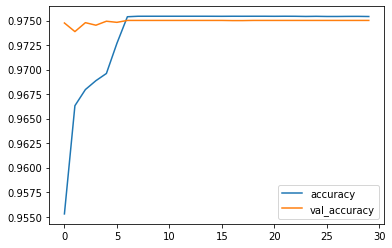

In [24]:
h1_df.plot(use_index=True,y=['accuracy','val_accuracy'])

In [25]:
modelo1.evaluate(X_test,y1_test)

2134/2134 [==============================] - 1s 678us/step - loss: 0.1026 - auc: 0.7857 - accuracy: 0.9752


[0.1025535836815834, 0.785732626914978, 0.9751560091972351]

2134/2134 [==============================] - 4s 513us/step


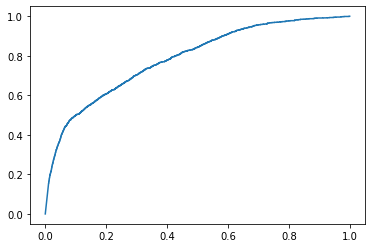

In [26]:
previsoes1=modelo1.predict(X_test).ravel()
fpr1,tpr1,cortes1=roc_curve(y1_test,previsoes1)
plt.plot(fpr1,tpr1)

In [27]:
cortes1[(tpr1-fpr1).argmax()]

0.027108034

In [58]:
#creating model2
X=df[['Diferença dias','sms_entregue','sms_enviado','sms_naoentregue','sms_rejeitado','sms_invalido','valor','qtd_hist_acessos','sms_total_tent','idade','rendaestimada','ddd','operadora','compradoronline','vendedoronline','utilizacaoweb']]
Y2=df['acordo']
X_train,X_test,y2_train,y2_test=train_test_split(X,Y2,test_size=0.5)
modelo2=Sequential()
modelo2.add(Dense(17,activation='relu', input_shape=(X_train.shape[1],)))
modelo1.add(Dense(12,activation='relu'))
modelo1.add(Dense(9,activation='relu'))
modelo1.add(Dense(6,activation='relu'))
modelo1.add(Dense(3,activation='relu'))
modelo2.add(Dense(1,activation='sigmoid'))
modelo2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['AUC','accuracy'])
historico2=modelo2.fit(X_train,y2_train,epochs=30,batch_size=2000,validation_split=0.3)
h2_df=pd.DataFrame(historico2.history)

Epoch 1/30
120/120 [==============================] - 1s 3ms/step - loss: 0.2521 - auc: 0.5137 - accuracy: 0.9869 - val_loss: 0.0543 - val_auc: 0.5300 - val_accuracy: 0.9960
Epoch 2/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0526 - auc: 0.5237 - accuracy: 0.9964 - val_loss: 0.1272 - val_auc: 0.5042 - val_accuracy: 0.9969
Epoch 3/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0519 - auc: 0.5273 - accuracy: 0.9966 - val_loss: 0.0333 - val_auc: 0.5374 - val_accuracy: 0.9966
Epoch 4/30
120/120 [==============================] - 0s 1ms/step - loss: 0.0297 - auc: 0.5641 - accuracy: 0.9968 - val_loss: 0.0293 - val_auc: 0.5594 - val_accuracy: 0.9966
Epoch 5/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0270 - auc: 0.5671 - accuracy: 0.9967 - val_loss: 0.0267 - val_auc: 0.5735 - val_accuracy: 0.9968
Epoch 6/30
120/120 [==============================] - 0s 1ms/step - loss: 0.0253 - auc: 0.5784 - accuracy: 0.9969 - val_loss: 0.02

<AxesSubplot: >

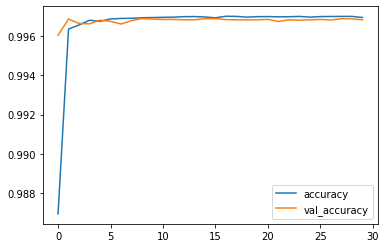

In [59]:
h2_df.plot(use_index=True,y=['accuracy','val_accuracy'])

In [60]:
modelo2.evaluate(X_test,y2_test)

10667/10667 [==============================] - 7s 661us/step - loss: 0.0206 - auc: 0.6191 - accuracy: 0.9969


[0.020636998116970062, 0.6191201210021973, 0.9969120621681213]

10667/10667 [==============================] - 5s 500us/step


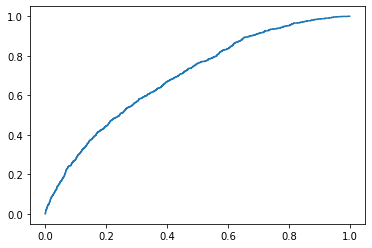

In [62]:
previsoes2=modelo2.predict(X_test).ravel()
fpr2,tpr2,cortes2=roc_curve(y2_test,previsoes2)
plt.plot(fpr2,tpr2)

In [63]:
cortes2[(tpr2-fpr2).argmax()]

0.002988538

In [64]:
modelo1.save('modelo1.h5')
modelo2.save('modelo2.h5')